MBAN 6110Assignment 3
Yuntong Zhu(217221508)

Question:
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.
You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/Users/zoezhu/Downloads/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Cleaning data

In [5]:
# checke no missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# drop duplicates
df = df.drop_duplicates()

In [8]:
#Drop lat and long, use zipcode
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)

In [9]:
# used to format the datetime values to the desired format of 'YYYY-MM-DD'
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-').dt.strftime('%Y-%m-%d')

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [11]:
# Transform datetime to a datetime data format
# Convert 'datetime' column to datetime data type
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype(int)


In [12]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,1400630400000000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


1.Feature engineering

Set the house grade to 4 levels,cause the grade can effect the house quality,then as well as effects the price.
0-4 id low quality, 5-7 is medium quality, 8-10 is standard quality, then over 10 is good quality.

def house_grade(x):
    if x >= 0 and x <= 4:
        return 'low quality'
    elif x >= 5 and x <= 8:
        return 'standard quality'
    else:
        return 'good quality'

house_grade(10)

#Add the house_grade's information into new column 'grade_level'
df['grade_level'] = df['grade'].apply(house_grade)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_level
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,standard quality
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,standard quality
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,standard quality
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,standard quality
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,standard quality


In [17]:
#Set 2 inputs,consider the house condition both on grade and condition,make sure the house quality and condition
def house_condition(grd,cond):
    if 0<= grd <=4 and 0<= cond <= 1:
        return 'bad condition'
    elif 5 <= grd <= 8  and 2<= cond <= 4:
        return 'standard condition'
    else: 
        return 'good condition'

# apply function
df['house_conditions'] = df.apply(lambda x: house_condition(x['grade'], x['condition']), axis=1)

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_level,house_conditions
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,1340,5650,standard quality,standard condition
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,1690,7639,standard quality,standard condition
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,2720,8062,standard quality,standard condition
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,1360,5000,standard quality,good condition
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,1800,7503,standard quality,standard condition


Feature engineering is an indispensable step as it involves converting raw data into a format suitable for training predictive models. Its purpose is to create new features or modify existing features to enhance the interpretability of the model. For example, combining grade and condition can more accurately reflect the situation and quality of the house. I tried the method of 1 input and 2 inputs, 2 inputs are more convincing

2.Craete dummies

In [19]:
dummies_house = pd.get_dummies(df['house_conditions'])

In [20]:
dummies_house.head()

,bad condition,good condition,standard condition
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [21]:
df = pd.concat([df,dummies_house], axis=1)

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_level,house_conditions,bad condition,good condition,standard condition
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,1340,5650,standard quality,standard condition,0,0,1
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,1690,7639,standard quality,standard condition,0,0,1
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,2720,8062,standard quality,standard condition,0,0,1
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,1360,5000,standard quality,good condition,0,1,0
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,1800,7503,standard quality,standard condition,0,0,1


Build Linear model 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso

In [24]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_level,house_conditions,bad condition,good condition,standard condition
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,1340,5650,standard quality,standard condition,0,0,1
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,1690,7639,standard quality,standard condition,0,0,1
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,2720,8062,standard quality,standard condition,0,0,1
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,1360,5000,standard quality,good condition,0,1,0
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,1800,7503,standard quality,standard condition,0,0,1


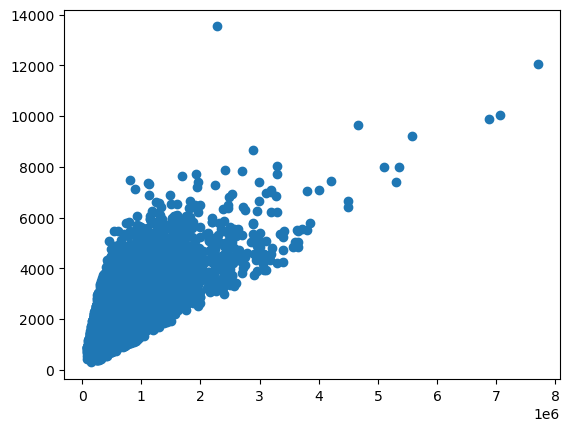

In [25]:
plt.scatter(df['price'],df['sqft_living'])

In [26]:
#Fit ols model

In [27]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + floors + waterfront + view + condition + grade", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4107.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:25:58   Log-Likelihood:            -2.9761e+05
No. Observations:               21613   AIC:                         5.952e+05
Df Residuals:                   21604   BIC:                         5.953e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.914e+05   1.73e+04    -40.009      

R:The R-squared value of 0.603 indicates that approximately 60.3% of the price change can be explained by the included predictor variables. In this case, the adjusted R-squared value is the same because there are no other predictor variables in the model. While this is a relatively high R-squared value, it does not necessarily imply that the model fits the data very well. 

Coefficients：These coefficients represent the estimated impact of each predictor variable on the target variable. When sqft_living increases by each unit, the price increases by 191.6344. The intercept term represents the estimated price when all predictor variables are zero.

OLS models do not have any form of feature selection or regularization and are susceptible to overfitting when there are multiple predictor variables in the model. ols models assume a linear relationship between the predictor and target variables.



Let's we try another model, first we need data Preparation and feature Engineering. In this step, the data is prepared and feature engineering is performed to ensure the input variables are in the appropriate format for the modeling process. This may involve tasks :

In [28]:
#set the categorical,numerical,and target 
categorical_features =['id','waterfront', 'view', 'grade_level', 'bad condition', 'standard condition', 
                        'good condition']
numerical_features =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                        'yr_built', 'yr_renovated']
target = 'price'

In [29]:
#Check these two features
df[categorical_features + numerical_features]

,id,waterfront,view,grade_level,bad condition,standard condition,good condition,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,0,0,standard quality,0,1,0,3,1.00,1180,5650,1.0,1180,0,1955,0
1,6414100192,0,0,standard quality,0,1,0,3,2.25,2570,7242,2.0,2170,400,1951,1991
2,5631500400,0,0,standard quality,0,1,0,2,1.00,770,10000,1.0,770,0,1933,0
3,2487200875,0,0,standard quality,0,0,1,4,3.00,1960,5000,1.0,1050,910,1965,0
4,1954400510,0,0,standard quality,0,1,0,3,2.00,1680,8080,1.0,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,0,0,standard quality,0,1,0,3,2.50,1530,1131,3.0,1530,0,2009,0
21609,6600060120,0,0,standard quality,0,1,0,4,2.50,2310,5813,2.0,2310,0,2014,0
21610,1523300141,0,0,standard quality,0,1,0,2,0.75,1020,1350,2.0,1020,0,2009,0
21611,291310100,0,0,standard quality,0,1,0,3,2.50,1600,2388,2.0,1600,0,2004,0


In [30]:
#slipt into two type
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [31]:
X_test

,id,waterfront,view,grade_level,bad condition,standard condition,good condition,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
12432,9414610240,0,0,standard quality,0,1,0,3,1.75,2030,10089,1.0,1330,700,1976,0
7793,251300110,0,0,standard quality,0,1,0,3,2.25,2510,12013,2.0,2510,0,1988,0
13435,7937900220,0,0,good quality,0,0,1,5,2.75,3630,38461,2.0,3630,0,2000,0
1821,1771110640,0,0,standard quality,0,1,0,3,1.00,1660,11783,1.0,1160,500,1978,0
12449,3905100310,0,0,standard quality,0,1,0,4,2.50,2030,3974,2.0,2030,0,1994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,8056000075,0,0,standard quality,0,1,0,2,1.75,1890,9466,2.0,1890,0,1987,0
21161,8564860280,0,0,standard quality,0,1,0,3,2.50,2680,5539,2.0,2680,0,2013,0
20133,5137800130,0,0,standard quality,0,1,0,4,2.50,2718,6197,2.0,2718,0,2006,0
11130,9557300560,0,0,standard quality,0,1,0,3,1.75,1980,6760,1.0,1980,0,1973,0


In [32]:
X_train

,id,waterfront,view,grade_level,bad condition,standard condition,good condition,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
15026,1323089056,0,0,standard quality,0,1,0,2,1.75,1620,113862,1.5,1620,0,1995,0
7354,1395500020,0,0,standard quality,0,1,0,3,1.00,1400,10800,1.0,1400,0,1962,0
6051,8024200010,0,0,standard quality,0,1,0,2,1.00,1460,6000,1.0,1260,200,1925,0
4398,3821000100,0,0,standard quality,0,1,0,4,1.75,1620,10530,1.0,1620,0,1968,0
9298,1422029138,0,0,good quality,0,0,1,3,2.50,2030,217805,1.0,2030,0,1999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,1954700610,0,0,good quality,0,0,1,3,2.25,3360,7108,2.0,2770,590,1905,2004
9449,3472800065,0,0,good quality,0,0,1,4,3.00,3600,9687,2.0,3600,0,1959,1995
8471,714000315,0,0,standard quality,0,1,0,3,2.75,1710,9448,1.0,1010,700,1947,0
17048,7889600080,0,0,standard quality,0,0,1,3,1.00,1050,6240,1.0,1050,0,1948,0


In [33]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [34]:
y_train

15026     439000.0
7354      279900.0
6051      312000.0
4398      249950.0
9298      565000.0
           ...    
8222     2193000.0
9449     1698000.0
8471      515000.0
17048     208000.0
1318      234975.0
Name: price, Length: 15129, dtype: float64

In [35]:
# define transformers 
cat_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scalar', MinMaxScaler())])

In [36]:
#building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

Let's use LASSO regression model

In [37]:
#create lasso model
lasso_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
    ])

In [38]:
y_train

15026     439000.0
7354      279900.0
6051      312000.0
4398      249950.0
9298      565000.0
           ...    
8222     2193000.0
9449     1698000.0
8471      515000.0
17048     208000.0
1318      234975.0
Name: price, Length: 15129, dtype: float64

In [39]:
#fit into lasso model
lasso_regression.fit(X_train, y_train)